# Activation Functions

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/ml/blob/main/notebooks/activation_functions.ipynb)
[![Render nbviewer](https://img.shields.io/badge/render-nbviewer-f37726)](https://nbviewer.org/github/adamelliotfields/ml/blob/main/notebooks/activation_functions.ipynb)

**Contents**
- [Sigmoid](#sigmoid)
- [Softmax](#softmax)
- [Tanh](#tanh)
- [ReLU](#relu)
- [Leaky ReLU](#leaky-relu)
- [Swish](#swish)
- [Mish](#mish)
- [GELU](#gelu)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from matplotlib.colors import rgb2hex
# from seaborn import color_palette
# for color in color_palette("husl", 3):
#     print(rgb2hex(color))
color_1 = "#f77189"
color_2 = "#50b131"
color_3 = "#3ba3ec"

## Sigmoid

$\sigma(x) = \frac{1}{1 + e^{-x}}$

**Range**: $(0, 1)$

Typically used in the output layer of a binary classifier.

Sigmoid is prone to _vanishing gradients_. This occurs when the gradients of the loss function with respect to the weights become very small during backpropagation (training). Likewise, it is also prone to _exploding gradients_. This occurs when the gradients become very large and cause unstable updates to the weights.

For very large positive and negative input values, sigmoid _saturates_. This means it outputs values close to 1 or 0. In these "saturation zones", the gradient (derivative) of the sigmoid function is close to zero. In other words, if $\sigma(x)$ is close to 0 or 1, $\sigma'(x)$ is close to 0.

When plotting, the sigmoid function is an S-shaped curve that asymptotically approaches 0 and 1 as $x$ approaches negative and positive infinity, respectively. _Asymptotically_ means that the curve gets closer and closer to the asymptote (0 or 1) but never touches it.

The first derivative ($sigmoid'$) is a bell-shaped curve that reaches a maximum of `0.25` at $x=0$ (where the sigmoid has the steepest slope). Its value decreases symmetrically as $x$ moves away from 0 in either direction.

The second derivative ($sigmoid''$) is a curve that changes sign at $x=0$. It is positive for $x<0$ and negative for $x>0$. It indicates the inflection points of the sigmoid function.

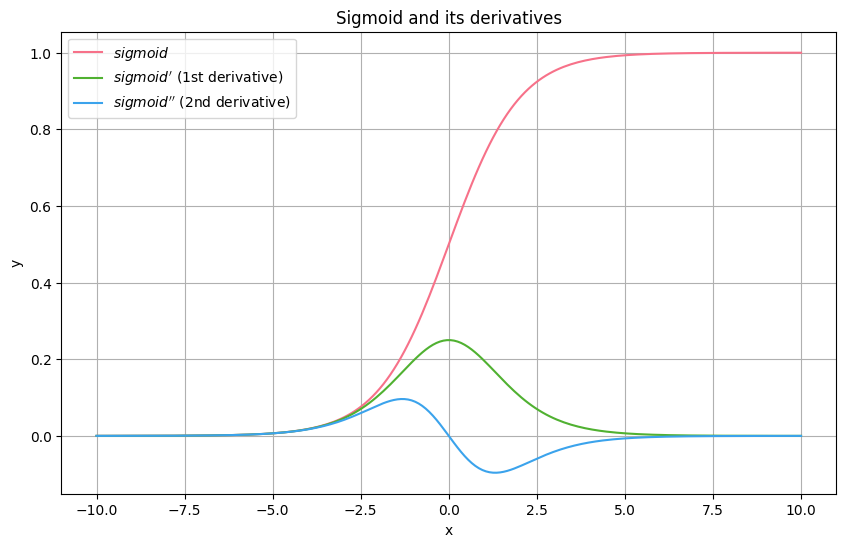

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)


def sigmoid_double_prime(x):
    s = sigmoid(x)
    return s * (1 - s) * (1 - 2 * s)


# 200 evenly-spaced values between -10 and 10 (x)
x = np.linspace(-10, 10, 200)
y_sig = sigmoid(x)
y_prime_sig = sigmoid_prime(x)
y_double_prime_sig = sigmoid_double_prime(x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_sig, label=r"$sigmoid$", color=color_1)
plt.plot(x, y_prime_sig, label=r"$sigmoid'$ (1st derivative)", color=color_2)
plt.plot(x, y_double_prime_sig, label=r"$sigmoid''$ (2nd derivative)", color=color_3)
plt.title("Sigmoid and its derivatives")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True);

## Softmax

$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

**Range**: $(0, 1)$ for each output; sum of all outputs is 1

Softmax is used in the output layer of a multi-class classifier. It converts the raw outputs of the model (logits) into probabilities that sum to 1 (a probability distribution).

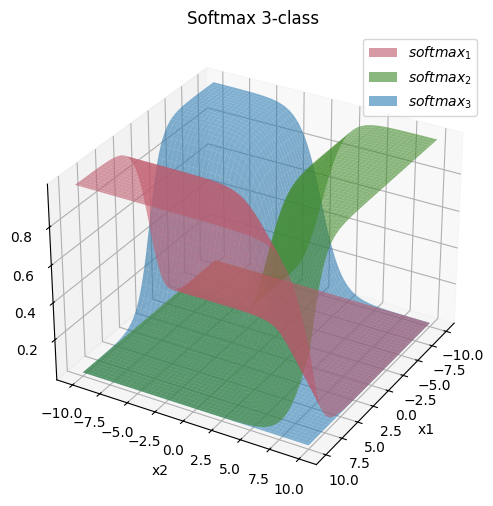

In [5]:
# subtract max value from x to prevent large exponentials
# perform along columns and ensure result has same dimensions as x
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / e_x.sum(axis=0, keepdims=True)


# example input for a 3-class problem
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)

# create the third dimension with the same shape as x1 and x2
x3 = np.zeros_like(x1)

# ravel returns a _view_; flatten returns a _copy_
x1_flat = x1.ravel()
x2_flat = x2.ravel()
x3_flat = x3.ravel()
inputs = np.vstack([x1_flat, x2_flat, x3_flat])

# apply softmax to input
y_soft = softmax(inputs)

# reshape back to original for plotting
y1 = y_soft[0].reshape(x1.shape)
y2 = y_soft[1].reshape(x2.shape)
y3 = y_soft[2].reshape(x3.shape)

# plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1, x2, y1, label=r"$softmax_1$", color=color_1, alpha=0.6)
ax.plot_surface(x1, x2, y2, label=r"$softmax_2$", color=color_2, alpha=0.6)
ax.plot_surface(x1, x2, y3, label=r"$softmax_3$", color=color_3, alpha=0.6)
ax.set_title("Softmax 3-class")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
ax.view_init(elev=30, azim=30);

## Tanh

$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$

**Range**: $(-1, 1)$

The hyperbolic tangent (tanh) activation function is used in neural network hidden layers.

Like sigmoid, tanh is also prone to vanishing gradients. On the other hand, it is less prone to exploding gradients. Tanh is symmetric around zero, which leads to more balanced weight updates.

The first derivative of tanh has a maximum value of `1` at $x=0$ and decreases as $x$ moves away from 0 in either direction.

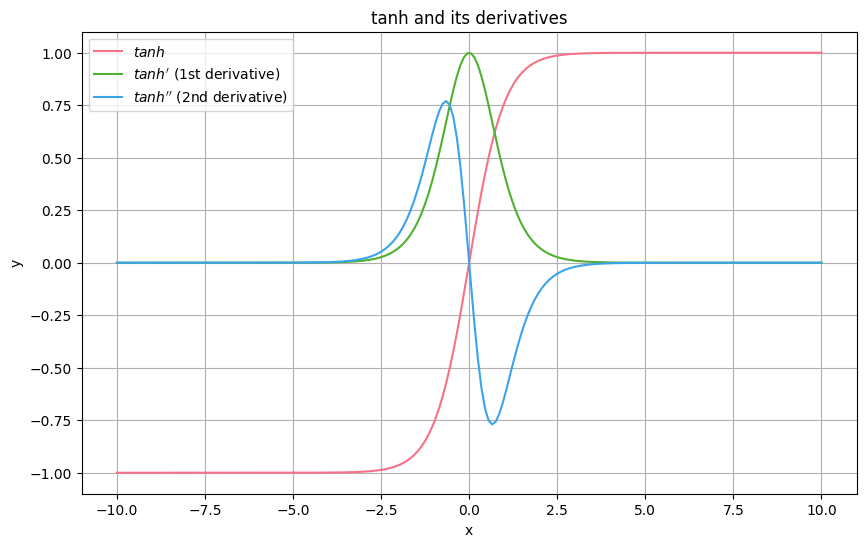

In [6]:
def tanh(x):
    return np.tanh(x)


def tanh_prime(x):
    return 1 - tanh(x) ** 2


def tanh_double_prime(x):
    return -2 * tanh(x) * (1 - tanh(x) ** 2)


# 200 evenly-spaced values between -10 and 10 (x)
x = np.linspace(-10, 10, 200)
y_tanh = tanh(x)
y_prime_tanh = tanh_prime(x)
y_double_prime_tanh = tanh_double_prime(x)

# plot
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(x, y_tanh, label=r"$tanh$", color=color_1)
plt.plot(x, y_prime_tanh, label=r"$tanh'$ (1st derivative)", color=color_2)
plt.plot(x, y_double_prime_tanh, label=r"$tanh''$ (2nd derivative)", color=color_3)
plt.title("tanh and its derivatives")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

## ReLU

$\text{ReLU}(x) = \max(0, x)$

**Range**: $(0, \infty)$

The _Rectified Linear Unit_ (ReLU) is probably the most popular activation function used in deep learning. While it circumvents vanishing and exploding gradients, it is prone to the _dying neuron_ problem. This is when neurons (units) only output zero, which effectively kills them as they no longer contribute to the model. This can happen if the model's weights and biases adjust in such a way that the input to the ReLU is always negative.

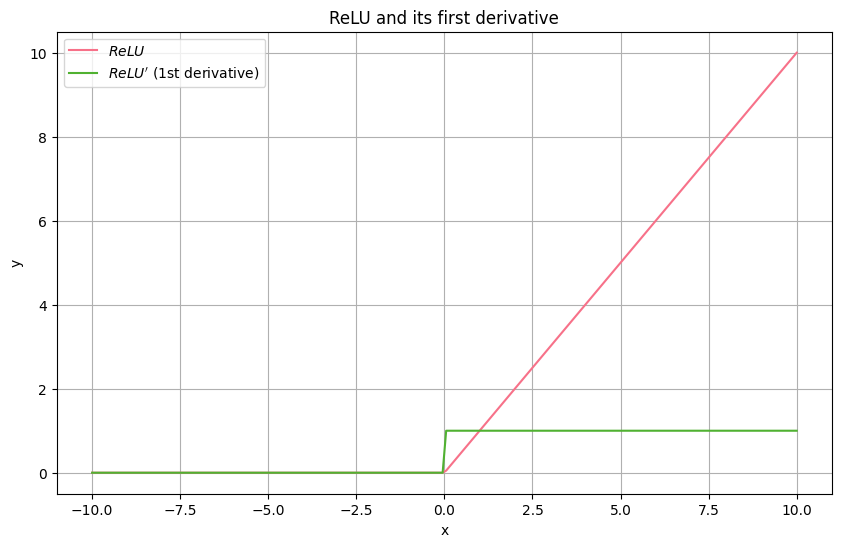

In [7]:
def relu(x):
    return np.maximum(0, x)


def relu_prime(x):
    return np.where(x > 0, 1, 0)


# 200 evenly-spaced values between -10 and 10 (x)
x = np.linspace(-10, 10, 200)
y_relu = relu(x)
y_prime_relu = relu_prime(x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label=r"$ReLU$", color=color_1)
plt.plot(x, y_prime_relu, label=r"$ReLU'$ (1st derivative)", color=color_2)
plt.title("ReLU and its first derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend();

## Leaky ReLU

$\text{LeakyReLU}(x) = \max(\alpha \cdot x, x)$

**Range**: $(-\infty, \infty)$

To mitigate the dying neuron problem, the _Leaky ReLU_ activation function was introduced, where $\alpha$ (alpha) is a small constant typically `0.01`.

When plotted, you'll see a slight slope for negative values. There's also [Parameterized ReLU](https://paperswithcode.com/method/prelu) (PReLU), where $\alpha$ is learned during training.

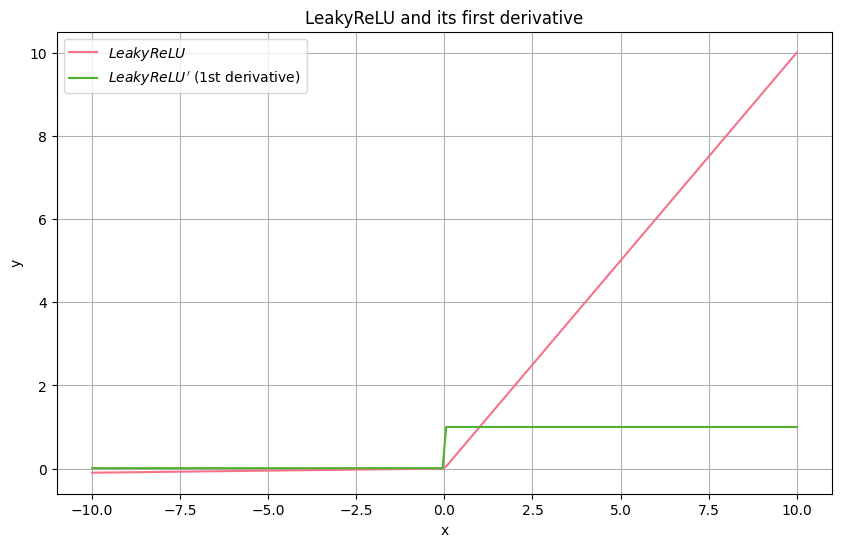

In [8]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)


def leaky_relu_prime(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)


# 200 evenly-spaced values between -10 and 10 (x)
x = np.linspace(-10, 10, 200)
y_lrelu = leaky_relu(x)
y_prime_lrelu = leaky_relu_prime(x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_lrelu, label=r"$LeakyReLU$", color=color_1)
plt.plot(x, y_prime_lrelu, label=r"$LeakyReLU'$ (1st derivative)", color=color_2)
plt.title("LeakyReLU and its first derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend();

## Swish

$\text{Swish}(x) = x \cdot \sigma(x)$

**Range**: $(-\infty, \infty)$

The Swish function was originally known as SiLU (Sigmoid Linear Unit) and was actually first mentioned in the GELU paper. A year later, Google Brain researchers released the paper, [Searching for Activation Functions](https://arxiv.org/abs/1710.05941), which demonstrated impressive results with Swish. For example, simply replacing ReLU units with Swish in Inception-ResNet-v2 resulted in a 0.6% accuracy improvement on ImageNet.

Unlike ReLU, which zeros out negative values, Swish allows negative values to pass through like Leaky ReLU. Unlike Leaky ReLU, which is piecewise linear (sharp), Swish is _continuously differentiable_ (smooth). This means that not only is the function itself differentiable at every point, but its derivatives are as well.

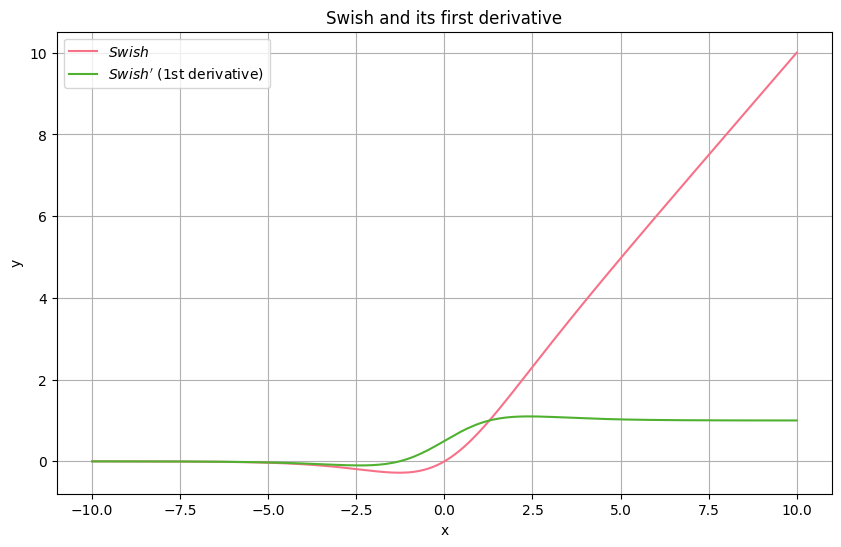

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def swish(x):
    return x * sigmoid(x)


def swish_prime(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)


# 200 evenly-spaced values between -10 and 10 (x)
x = np.linspace(-10, 10, 200)
y_swish = swish(x)
y_prime_swish = swish_prime(x)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_swish, label=r"$Swish$", color=color_1)
plt.plot(x, y_prime_swish, label=r"$Swish'$ (1st derivative)", color=color_2)
plt.title("Swish and its first derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend();

## Mish

$\begin{aligned}
\text{softplus}(x) &= \log(1 + e^x) \\
\text{Mish}(x) &= x \cdot \tanh(\text{softplus}(x))
\end{aligned}$

**Range**: $(-\infty, \infty)$

Mish, named after the author, Diganta Misra, was introduced in [A Self Regularized Non-Monotonic Activation Function](https://arxiv.org/abs/1908.08681).

The first derivative of Mish is computed by taking the product of the exponential of `x` and the `omega` term, and then dividing by the square of the `delta` term. In the paper, they propose how this may act as a self-regularizer.

Self-regularization means you might not need to use traditional regularization techniques like dropout or batch normalization, resulting in simpler models.

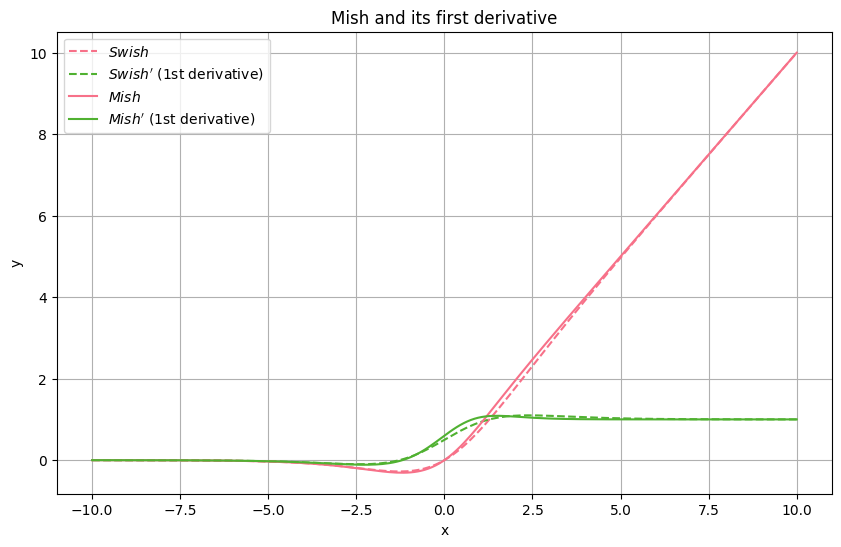

In [10]:
# natural logarithm of 1 plus the exponential of x
def softplus(x):
    return np.log1p(np.exp(x))


def mish(x):
    return x * np.tanh(softplus(x))


def mish_prime(x):
    # mish's derivative is composed of omega and delta terms
    omega = 4 * (x + 1) + 4 * np.exp(2 * x) + np.exp(3 * x) + np.exp(x) * (4 * x + 6)
    delta = 2 * np.exp(x) + np.exp(2 * x) + 2
    return np.exp(x) * omega / (delta**2)


# 200 evenly-spaced values between -10 and 10 (x)
x = np.linspace(-10, 10, 200)
y_mish = mish(x)
y_prime_mish = mish_prime(x)

# plot (swish shown in dashed for comparison; calculated in previous cell)
plt.figure(figsize=(10, 6))
plt.plot(
    x,
    y_swish,
    label=r"$Swish$",
    color=color_1,
    linestyle="--",
)
plt.plot(
    x,
    y_prime_swish,
    label=r"$Swish'$ (1st derivative)",
    color=color_2,
    linestyle="--",
)
plt.plot(x, y_mish, label=r"$Mish$", color=color_1)
plt.plot(x, y_prime_mish, label=r"$Mish'$ (1st derivative)", color=color_2)
plt.title("Mish and its first derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend();

## GELU

$\text{GELU}(x) = x \cdot \Phi(x)$

**Range**: $(-\infty, \infty)$

GELU was first introduced in the paper, [Gaussian Error Linear Units](https://arxiv.org/abs/1606.08415v5). It has been widely-adopted in NLP, as it is used in BERT, GPT, and other Transformer-based models.

It is like Swish/Mish in that it is smooth and non-monotonic. It differs in that it is a probabilistic function based on the Gaussian cumulative distribution function (CDF). It weighs the input `x` by the probability that a random variable is less than `x`.

To make it more efficient, it is often approximated by the following function:

$\text{GELU}(x) = 0.5x\Big(1 + \tanh\Big(\sqrt{2/\pi}(x + 0.044715x^3)\Big)\Big)$

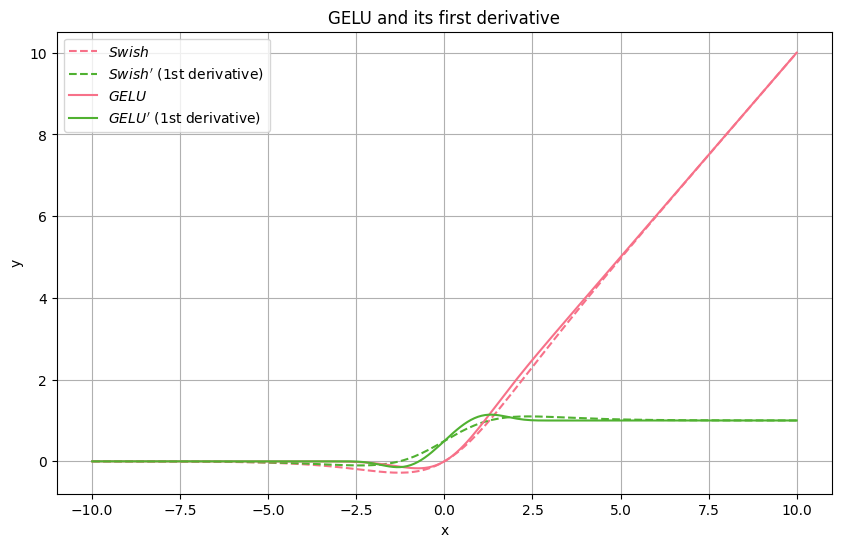

In [11]:
gelu_coef = 0.044715


def cdf(x):
    return 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * x))


def pdf(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)


def gelu(x):
    return x * cdf(x + gelu_coef * x**3)


def gelu_prime(x):
    x_trans = x + gelu_coef * x**3
    gelu_cdf = cdf(x_trans)
    gelu_pdf = pdf(x_trans)
    return gelu_cdf + x * gelu_pdf * (1 + (3 * gelu_coef) * x**2)


x = np.linspace(-10, 10, 200)
y_gelu = gelu(x)
y_prime_gelu = gelu_prime(x)

# plot (swish shown in dashed for comparison; calculated in previous cell)
plt.figure(figsize=(10, 6))
plt.plot(
    x,
    y_swish,
    label=r"$Swish$",
    color=color_1,
    linestyle="--",
)
plt.plot(
    x,
    y_prime_swish,
    label=r"$Swish'$ (1st derivative)",
    color=color_2,
    linestyle="--",
)
plt.plot(x, y_gelu, label=r"$GELU$", color=color_1)
plt.plot(x, y_prime_gelu, label=r"$GELU'$ (1st derivative)", color=color_2)
plt.title("GELU and its first derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend();